# 1. Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 12,4

# 2. Import dataset
* 01_clean is imported 
* There are 15 independent variables

In [3]:
df = pd.read_csv('../01 raw data/01_clean.csv')
df['paymentInstrumentAgeInAccount'] = pd.to_numeric(df['paymentInstrumentAgeInAccount'], errors='coerce')
df['isProxyIP'] = np.where(df['isProxyIP']==True,'True',np.where(df['isProxyIP']==False,'False',df['isProxyIP']))
print(df.shape)

(199927, 17)


# 3. categorical
* there are 9 categorical variables 
* each category is replaced with the average Fraud

In [4]:
for i in ['accountCountry','isUserRegistered','isProxyIP','transactionCurrencyCode', 'cardType','cvvVerifyResult',
          'paymentInstrumentType','ipState','ipCountryCode']:
    gb = pd.read_csv('../03 rolledup data/'+i+'_b.csv')
    df[i] = df[i].fillna('MISSING')
    df = pd.merge(df,gb,how='left',on=i)
    df = df.drop(i, axis=1)
    print(i,'\t\t',df['b_'+i].isnull().sum(),'\t\t',df.shape)

accountCountry 		 0 		 (199927, 17)
isUserRegistered 		 0 		 (199927, 17)
isProxyIP 		 0 		 (199927, 17)
transactionCurrencyCode 		 0 		 (199927, 17)
cardType 		 0 		 (199927, 17)
cvvVerifyResult 		 0 		 (199927, 17)
paymentInstrumentType 		 0 		 (199927, 17)
ipState 		 0 		 (199927, 17)
ipCountryCode 		 0 		 (199927, 17)


# 4. numerical
* there are 6 categorical variables
* each bin is replaced with average Fraud

In [5]:
for i in ['localWeekday','localHour','accountAge','transactionAmountUSD','numPaymentRejects1dPerUser',
          'paymentInstrumentAgeInAccount']:
    gb = pd.read_csv('../03 rolledup data/c_'+i+'_b.csv')
    gb['key'] = 1
    df['key'] = 1
    df['flag'] = 0
    df = pd.merge(df,gb,how='left',on='key')

    df['flag'] = np.where((df[i].isnull()) & (df[i+'_min'].isnull()) & (df[i+'_max'].isnull()), 1,
                          np.where((df[i]>=df[i+'_min']) & (df[i]<=df[i+'_max']), 1, 0))
    df = df[df['flag']==1]
    df = df.drop([i,'key','flag',i+'_min',i+'_max'], axis=1)
    print(i,'\t\t',df['b_'+i].isnull().sum(),'\t\t',df.shape)

localWeekday 		 0 		 (199927, 17)
localHour 		 0 		 (199927, 17)
accountAge 		 0 		 (199927, 17)
transactionAmountUSD 		 0 		 (199927, 17)
numPaymentRejects1dPerUser 		 0 		 (199927, 17)
paymentInstrumentAgeInAccount 		 0 		 (199927, 17)


# 5. Export dataset
* the data is highly skewed 
* all the variables are now transformed

Fraud
0.0    198849
1.0      1078
Name: count, dtype: int64 



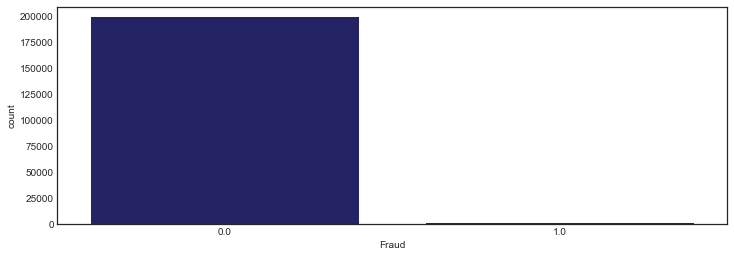

In [6]:
print(df['Fraud'].value_counts(),'\n')
sns.countplot(df['Fraud'], color='midnightblue');

In [7]:
df.to_csv('../01 raw data/04_clean.csv',index=False)
print(df.info(),'\n')
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 199927 entries, 0 to 1799335
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   transactionID                    199927 non-null  object 
 1   Fraud                            199927 non-null  float64
 2   b_accountCountry                 199927 non-null  float64
 3   b_isUserRegistered               199927 non-null  float64
 4   b_isProxyIP                      199927 non-null  float64
 5   b_transactionCurrencyCode        199927 non-null  float64
 6   b_cardType                       199927 non-null  float64
 7   b_cvvVerifyResult                199927 non-null  float64
 8   b_paymentInstrumentType          199927 non-null  float64
 9   b_ipState                        199927 non-null  float64
 10  b_ipCountryCode                  199927 non-null  float64
 11  b_localWeekday                   199927 non-null  float64
 12  b_loca